In [3]:
import pandas as pd

# Load the dataset
data_path = "C:\\Users\\Snigdha\\Downloads\\telecom_churn_data.csv"
telecom_data = pd.read_csv(data_path)

# Step 1: Derive New Features
telecom_data['change_in_ic_mou_6_7'] = telecom_data['total_ic_mou_7'] - telecom_data['total_ic_mou_6']
telecom_data['change_in_og_mou_6_7'] = telecom_data['total_og_mou_7'] - telecom_data['total_og_mou_6']
telecom_data['change_in_data_usage_6_7'] = (telecom_data['vol_2g_mb_7'] + telecom_data['vol_3g_mb_7']) - (telecom_data['vol_2g_mb_6'] + telecom_data['vol_3g_mb_6'])

# Step 2: Filter High-Value Customers
telecom_data['avg_rech_amt_6_7'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']) / 2
threshold = telecom_data['avg_rech_amt_6_7'].quantile(0.7)

# Create a copy to avoid SettingWithCopyWarning
high_value_customers = telecom_data[telecom_data['avg_rech_amt_6_7'] >= threshold].copy()

# Step 3: Tag Churners and Remove Attributes of the Churn Phase
high_value_customers['churn'] = ((high_value_customers['total_ic_mou_9'] == 0) &
                                 (high_value_customers['total_og_mou_9'] == 0) &
                                 (high_value_customers['vol_2g_mb_9'] == 0) &
                                 (high_value_customers['vol_3g_mb_9'] == 0)).astype(int)

# Remove columns related to September (all columns with '_9' in their names)
columns_to_remove = [col for col in high_value_customers.columns if '_9' in col]
data_prepared = high_value_customers.drop(columns=columns_to_remove)

# Print the number of high-value customers and preview the data
print(f"Number of high-value customers: {data_prepared.shape[0]}")
print(data_prepared.head())


Number of high-value customers: 30011
    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      

In [1]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [4]:
import pandas as pd

# Load the dataset again if needed
data_path = "C:\\Users\\Snigdha\\Downloads\\telecom_churn_data.csv"
telecom_data = pd.read_csv(data_path)

# Step 1: Derive New Features
telecom_data['change_in_ic_mou_6_7'] = telecom_data['total_ic_mou_7'] - telecom_data['total_ic_mou_6']
telecom_data['change_in_og_mou_6_7'] = telecom_data['total_og_mou_7'] - telecom_data['total_og_mou_6']
telecom_data['change_in_data_usage_6_7'] = (telecom_data['vol_2g_mb_7'] + telecom_data['vol_3g_mb_7']) - (telecom_data['vol_2g_mb_6'] + telecom_data['vol_3g_mb_6'])

# Step 2: Filter High-Value Customers
telecom_data['avg_rech_amt_6_7'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']) / 2
threshold = telecom_data['avg_rech_amt_6_7'].quantile(0.7)

# Create a copy to avoid SettingWithCopyWarning
high_value_customers = telecom_data[telecom_data['avg_rech_amt_6_7'] >= threshold].copy()

# Step 3: Tag Churners and Remove Attributes of the Churn Phase
high_value_customers['churn'] = ((high_value_customers['total_ic_mou_9'] == 0) &
                                 (high_value_customers['total_og_mou_9'] == 0) &
                                 (high_value_customers['vol_2g_mb_9'] == 0) &
                                 (high_value_customers['vol_3g_mb_9'] == 0)).astype(int)

# Remove columns related to September (all columns with '_9' in their names)
columns_to_remove = [col for col in high_value_customers.columns if '_9' in col]
data_prepared = high_value_customers.drop(columns=columns_to_remove)

# Print the number of high-value customers and preview the data
print(f"Number of high-value customers: {data_prepared.shape[0]}")
print(data_prepared.head())


Number of high-value customers: 30011
    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 1: Select only numeric columns for features
numeric_cols = X.select_dtypes(include=['number']).columns
X = X[numeric_cols]

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 5: Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability for ROC-AUC

# Print the evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8231
           1       0.73      0.36      0.49       773

    accuracy                           0.93      9004
   macro avg       0.83      0.68      0.73      9004
weighted avg       0.92      0.93      0.92      9004

Confusion Matrix:
[[8125  106]
 [ 491  282]]
ROC-AUC Score: 0.8951664604342621


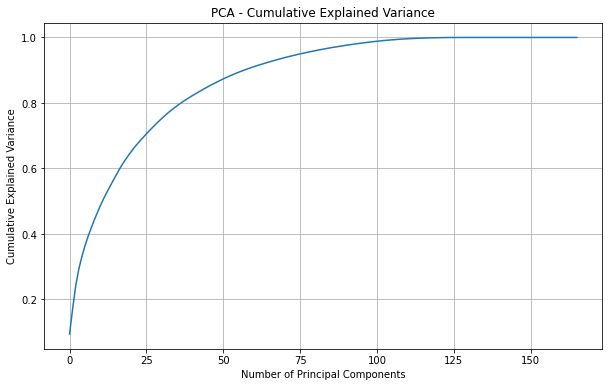

Number of components to retain 95% variance: 77


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply PCA to find the optimal number of components
pca = PCA()
pca.fit(X_train_scaled)

# Plot the cumulative explained variance to decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 2: Transform the data with the optimal number of components (e.g., explaining 95% variance)
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [9]:
# Train logistic regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_pca.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred_pca = logreg_pca.predict(X_test_pca)
y_prob_pca = logreg_pca.predict_proba(X_test_pca)[:, 1]

# Print evaluation metrics
print("Classification Report for PCA-transformed Model:")
print(classification_report(y_test, y_pred_pca))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_pca))


Classification Report for PCA-transformed Model:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8231
           1       0.27      0.81      0.41       773

    accuracy                           0.80      9004
   macro avg       0.63      0.80      0.64      9004
weighted avg       0.92      0.80      0.84      9004

Confusion Matrix:
[[6580 1651]
 [ 149  624]]
ROC-AUC Score: 0.8657432547229789


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on PCA-transformed data
rf_pca = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred_rf_pca = rf_pca.predict(X_test_pca)
y_prob_rf_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Print evaluation metrics
print("Classification Report for Random Forest on PCA-transformed Data:")
print(classification_report(y_test, y_pred_rf_pca))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_pca))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf_pca))


Classification Report for Random Forest on PCA-transformed Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8231
           1       0.67      0.12      0.20       773

    accuracy                           0.92      9004
   macro avg       0.80      0.56      0.58      9004
weighted avg       0.90      0.92      0.89      9004

Confusion Matrix:
[[8185   46]
 [ 680   93]]
ROC-AUC Score: 0.8722922664970076


In [11]:
# Train a Random Forest model on the original scaled data (without PCA)
rf_original = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_original.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf_original = rf_original.predict(X_test_scaled)
y_prob_rf_original = rf_original.predict_proba(X_test_scaled)[:, 1]

# Print evaluation metrics
print("Classification Report for Random Forest on Original Data:")
print(classification_report(y_test, y_pred_rf_original))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_original))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf_original))


Classification Report for Random Forest on Original Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8231
           1       0.75      0.47      0.58       773

    accuracy                           0.94      9004
   macro avg       0.85      0.73      0.77      9004
weighted avg       0.93      0.94      0.94      9004

Confusion Matrix:
[[8111  120]
 [ 409  364]]
ROC-AUC Score: 0.9229890533107491


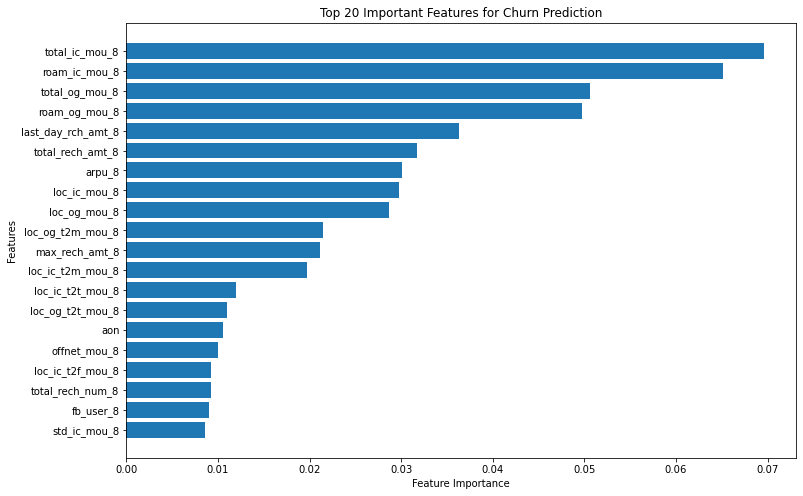

In [12]:
# Extract feature importances from the trained Random Forest model
importances = rf_original.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 most important features
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#1. Monitor Key Usage Patterns:
Reduced Incoming and Outgoing Calls: Since features like total_ic_mou_8 and total_og_mou_8 are strong predictors of churn, implement monitoring systems that flag customers whose call usage drops significantly compared to their usual pattern.
Roaming Behavior: Monitor changes in roam_ic_mou_8 and roam_og_mou_8, as changes in roaming call usage can indicate potential churn. Consider offering incentives for customers who use roaming services frequently to keep them engaged.
2. Targeted Retention Campaigns:
Identify High-Risk Customers: Use the model to identify customers who show signs of reduced engagement and target them with retention strategies such as personalized discounts, loyalty programs, or service enhancements.
Special Offers on Recharge Amounts: For customers who exhibit reduced recharge activity (e.g., lower last_day_rech_amt_8 or total_rech_amt_8), provide promotions or discounts on recharges to encourage continued usage.
3. Proactive Engagement:
Customized Communication Plans: Create tailored communication plans or bundled packages for customers with changing local and roaming usage patterns. This could involve special deals for high roaming users or added data packages for customers showing reduced internet usage.
Loyalty Programs for High ARPU Customers: Since high-value customers contribute significantly to revenue, provide loyalty programs or rewards for consistent usage to maintain their satisfaction and prevent churn.
4. Improve Customer Service:
Address Service Issues Promptly: If the drop in usage is linked to service dissatisfaction, invest in better customer support and problem resolution mechanisms to quickly address complaints and improve customer retention.
5. Predictive Alerts for Customer Support:
Implement Predictive Analytics: Integrate the churn prediction model with customer support systems so that agents receive alerts when customers are flagged as high-risk. This enables them to proactively reach out and engage with these customers before they decide to switch to a competitor.
6. Feedback and Surveys:
Collect Feedback from High-Risk Customers: Engage with customers flagged by the model to understand their reasons for reduced usage or dissatisfaction. Use this feedback to refine service offerings and address common pain points.
7. Monitor Financial Trends:
Track Financial Metrics: Ensure continuous tracking of recharge patterns (e.g., last_day_rech_amt_8, total_rech_amt_8) and adjust retention strategies based on these metrics. This can help identify customers who may be financially strained or looking for better value options.
8. Data-Driven Marketing:
Personalized Marketing Campaigns: Leverage the predictive model to segment customers into groups based on churn risk and tailor marketing campaigns accordingly. Offer high-risk customers personalized promotions that are relevant to their usage behavior.
Implementation Plan:
Develop a Dashboard: Create a dashboard for real-time tracking of customer behavior using the identified key features.
Periodic Model Retraining: Schedule regular retraining of the churn prediction model to ensure it adapts to new data and market trends.
Customer Education: Inform customers about new promotions or service enhancements through targeted emails or app notifications.
Conclusion:
Implementing these strategies, based on insights from the predictive model and feature importance analysis, will help the telecom company proactively manage churn, improve customer satisfaction, and maintain revenue stability